<a href="https://colab.research.google.com/github/shubhamnawani99/stocks-analysis/blob/master/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#start 2.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [92]:
path = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/week2.csv"
df = pd.read_csv(path)
del df['Unnamed: 0']
df.dtypes

Date                      object
Close Price              float64
Open Price               float64
High Price               float64
Low Price                float64
Total Traded Quantity    float64
Month                      int64
Year                       int64
VWAP                     float64
Day_Perc_Change          float64
Trend                     object
dtype: object

In [93]:
if df.Date.dtype != '<M8[ns]':
  df.Date = df.Date.apply(pd.to_datetime)
df.Date.dtype

dtype('<M8[ns]')

In [94]:
df.set_index('Date', inplace = True)
df.head()

,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,
2019-10-24,52.23,52.11,52.42,51.44,25650000.0,10,2019,52.230000,0.000000,Slight or No change
2019-10-23,51.72,51.37,51.96,51.20,15960000.0,10,2019,52.034384,-0.009765,Slight or No change
2019-10-22,52.01,51.90,52.32,51.89,13350000.0,10,2019,52.028461,0.005607,Slight or No change
2019-10-21,52.13,51.52,52.17,51.34,13120000.0,10,2019,52.048029,0.002307,Slight or No change
2019-10-18,51.36,51.75,51.82,51.03,16980000.0,10,2019,51.910682,-0.014771,Slight or No change


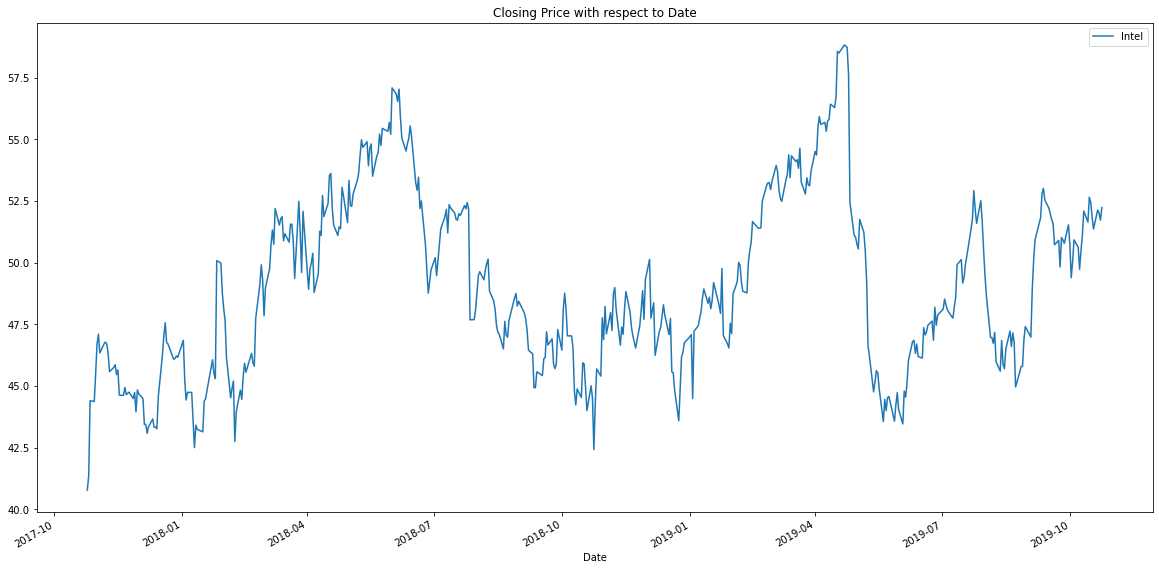

In [95]:
df['Close Price'].plot(label = 'Intel', figsize=(20,10),title='Closing Price with respect to Date')
plt.legend()

In [96]:
df['Close Price'].diff().abs().sort_values(ascending = False)
#end 2.1

Date
2019-04-25    5.18
2018-01-25    4.78
2018-07-26    4.48
2018-03-29    3.16
2018-03-23    3.12
              ... 
2019-08-27    0.00
2018-09-11    0.00
2018-01-05    0.00
2018-10-05    0.00
2019-10-24     NaN
Name: Close Price, Length: 503, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

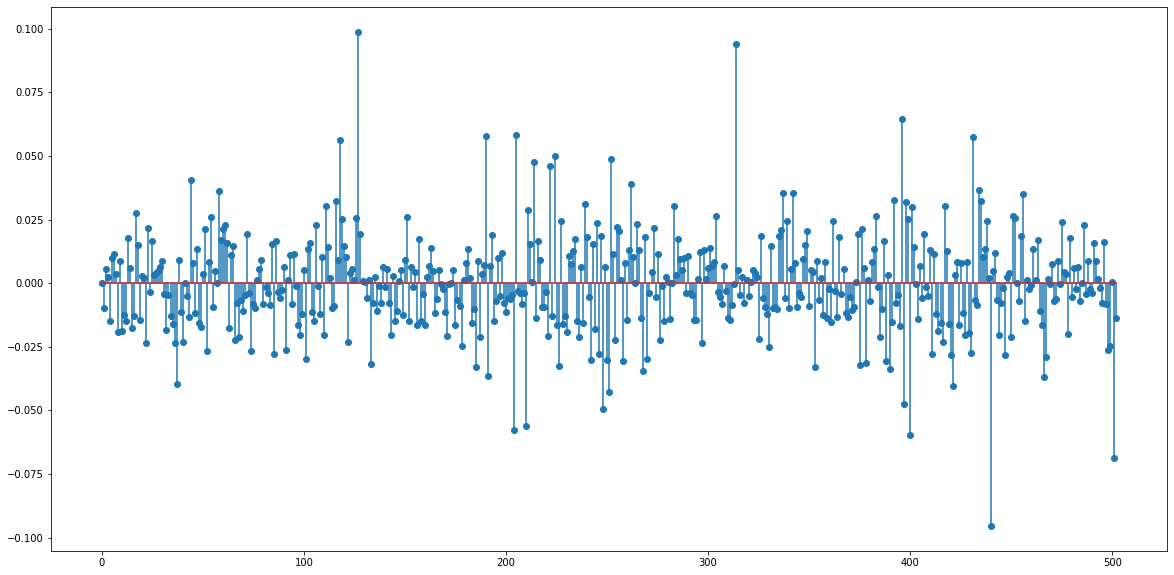

In [97]:
#start 2.2
plt.figure(figsize=(20,10))
plt.stem(df['Day_Perc_Change'])
#end 2.2

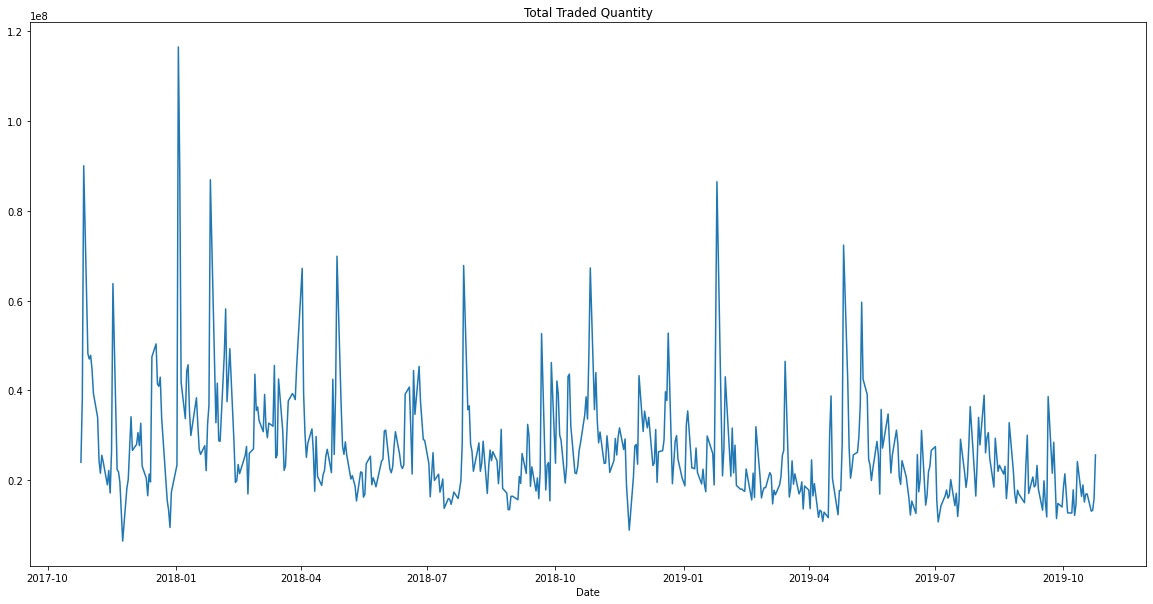

In [98]:
#start 2.3
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Total Traded Quantity')
ax.set_xlabel('Date')
ax.plot(df['Total Traded Quantity'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


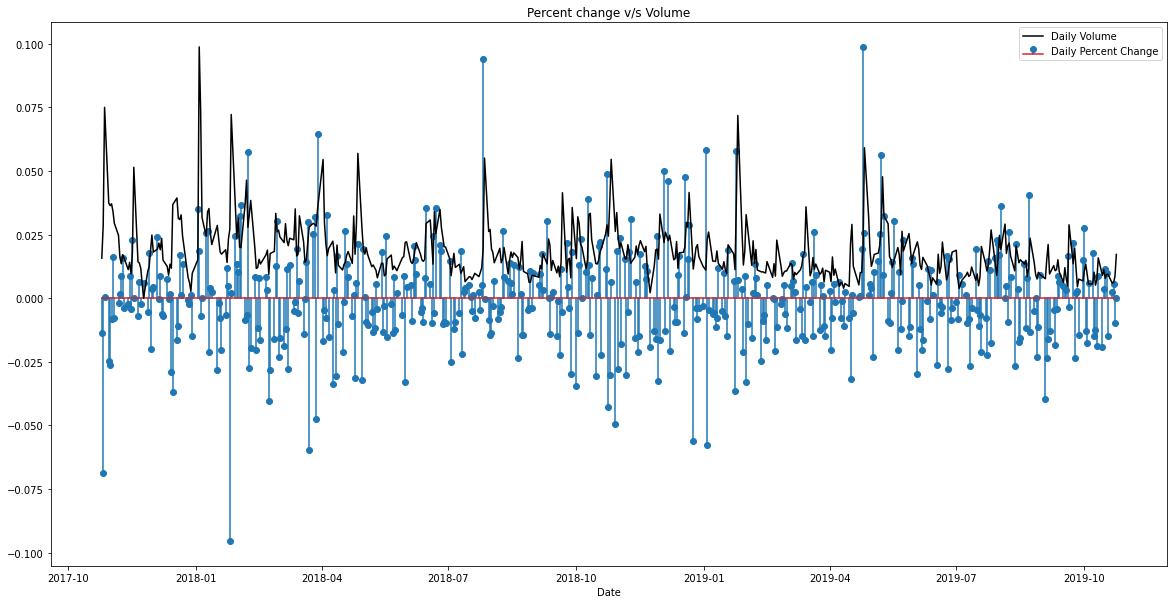

In [99]:
ScaledVol =  df["Total Traded Quantity"] - df["Total Traded Quantity"].min()
ScaledVol = ScaledVol/ScaledVol.max() * df.Day_Perc_Change.max()
fig, ax = plt.subplots(figsize=(20, 10))

ax.stem(df.index, df.Day_Perc_Change, label='Daily Percent Change')
ax.plot(df.index, ScaledVol,'k', label='Daily Volume')
ax.set_title('Percent change v/s Volume')
ax.set_xlabel('Date')
plt.legend(loc=1)

plt.show()
#end 2.3